In [1]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=4313dce3182394d9b838960ca75f2894661c9efb1e9cbe2b482848c884d228fd
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [3]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [4]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [6]:
base.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [7]:
X = base.iloc[:,[1,25]].values

In [8]:
X.shape

(30000, 2)

In [9]:
X.T.shape

(2, 30000)

In [10]:
r = skfuzzy.cmeans(data = X.T, c = 3, m=2, error=0.005, maxiter=1000, init=None)

In [11]:
r

(array([[ 308714.95594202, 1332270.5759113 ],
        [ 140102.36240323,   80565.45391442],
        [ 175795.84108992,  491926.50635503]]),
 array([[0.00987789, 0.00245832, 0.00185364, ..., 0.00684959, 0.0192697 ,
         0.01726457],
        [0.91996035, 0.97855707, 0.9800103 , ..., 0.93563684, 0.59885222,
         0.71957008],
        [0.07016175, 0.01898461, 0.01813606, ..., 0.05751357, 0.38187808,
         0.26316535]]),
 array([[0.33877942, 0.36718887, 0.320423  , ..., 0.57413717, 0.82245051,
         0.18955599],
        [0.43144666, 0.45424452, 0.29261382, ..., 0.41463545, 0.17312708,
         0.55723078],
        [0.22977392, 0.17856661, 0.38696318, ..., 0.01122739, 0.00442241,
         0.25321323]]),
 array([[1355666.97230772, 1328663.79370951, 1249902.33622252, ...,
         1292190.81682308, 1089926.99884121, 1131374.31730494],
        [ 140475.51004129,   66594.96042971,   54359.27996484, ...,
          110561.85648273,  195512.75964686,  175245.81232373],
        [ 508668

In [12]:
previsoes_porcentagem = r[1]

In [13]:
previsoes_porcentagem.shape

(3, 30000)

In [14]:
previsoes_porcentagem

array([[0.00987789, 0.00245832, 0.00185364, ..., 0.00684959, 0.0192697 ,
        0.01726457],
       [0.91996035, 0.97855707, 0.9800103 , ..., 0.93563684, 0.59885222,
        0.71957008],
       [0.07016175, 0.01898461, 0.01813606, ..., 0.05751357, 0.38187808,
        0.26316535]])

In [15]:
previsoes_porcentagem[0][0]

0.009877892964895585

In [16]:
previsoes_porcentagem[1][0]

0.9199603544183461

In [17]:
previsoes_porcentagem[2][0]

0.07016175261675833

In [18]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [19]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [20]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
previsoes[5000]

1

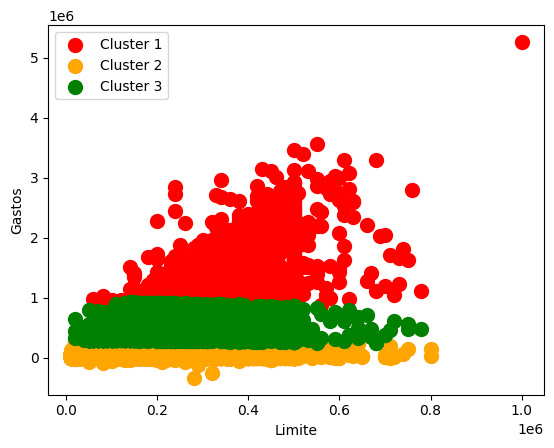

In [22]:
plt.scatter(X[previsoes ==0, 0], X[previsoes ==0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[previsoes ==1, 0], X[previsoes ==1, 1], s = 100, c= 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes ==2, 0], X[previsoes ==2, 1], s = 100, c= 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();